In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy as sc
import seaborn as sbn


df=pd.read_csv('test.csv')

df

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale


## Veri Doldurma

In [2]:
df.isnull().sum()

PassengerId       0
HomePlanet       87
CryoSleep        93
Cabin           100
Destination      92
Age              91
VIP              93
RoomService      82
FoodCourt       106
ShoppingMall     98
Spa             101
VRDeck           80
Name             94
dtype: int64

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'HomePlanet')

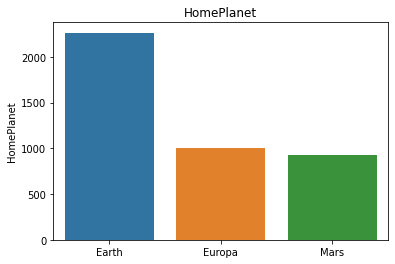

In [3]:
sbn.barplot(df['HomePlanet'].value_counts().index,df['HomePlanet'].value_counts()).set_title('HomePlanet')

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Destination')

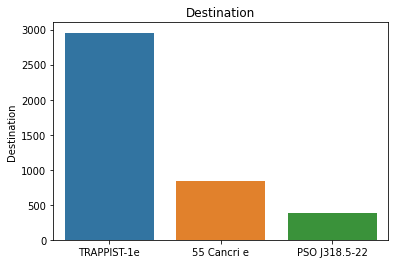

In [4]:
sbn.barplot(df['Destination'].value_counts().index,df['Destination'].value_counts()).set_title('Destination')

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'CryoSleep')

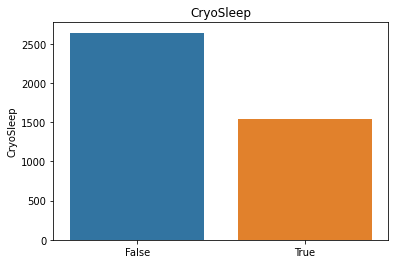

In [5]:
sbn.barplot(df['CryoSleep'].value_counts().index,df['CryoSleep'].value_counts()).set_title('CryoSleep')

c:\Users\mehmu\Desktop\PyProjects\env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'VIP')

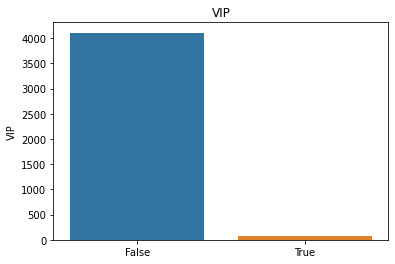

In [6]:
sbn.barplot(df['VIP'].value_counts().index,df['VIP'].value_counts()).set_title('VIP')

HomePlanet Earth yazılacak

CryoSleep,VIP mod girilecek

Destination'a mod girilecek

Cabin mod veya medyan ile doldurulabilir

Age ortalama ile doldurulacak 

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck ortalama ile doldurulabilir + toplanabilir

In [7]:
print(df['Age'].mean())
print(df['RoomService'].mean())
print(df['FoodCourt'].mean())
print(df['ShoppingMall'].mean())
print(df['Spa'].mean())
print(df['VRDeck'].mean())

28.65814620162446
219.26626936829558
439.4842963318149
177.29552524527398
303.05244252873564
310.71003097450557


In [8]:
df['HomePlanet'].fillna('Earth',inplace=True)
df['Destination'].fillna(df['Destination'].mode()[0], inplace=True)
df['CryoSleep'].fillna(df['CryoSleep'].mode()[0], inplace=True)
df['VIP'].fillna(df['VIP'].mode()[0], inplace=True)

df['Age'].fillna(29,inplace=True)
df['RoomService'].fillna(219,inplace=True)
df['FoodCourt'].fillna(439,inplace=True)
df['ShoppingMall'].fillna(177,inplace=True)
df['Spa'].fillna(303,inplace=True)
df['VRDeck'].fillna(311,inplace=True)

In [9]:
df["Cabin"]= df["Cabin"].str.split("/", n = 1, expand = True)[0]
df['Cabin'].fillna(df['Cabin'].mode()[0], inplace=True)

## Veriyi Düzenleme

PassengerId,Name atılacak

Homeplanet,CryoSleep,VIP,Transported sınıflandırılacak

Destination düzenlenip sınıflandırılabilir

Cabin in ilk harfler alındı



In [10]:
df.drop(['Name','PassengerId'],axis=1,inplace=True)

In [12]:
for i in ['CryoSleep','VIP']:
    df[i]=pd.get_dummies(df[i])[1]
df


,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,Earth,1,G,TRAPPIST-1e,27.0,0,0.0,0.0,0.0,0.0,0.0
1,Earth,0,F,TRAPPIST-1e,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,Europa,1,C,55 Cancri e,31.0,0,0.0,0.0,0.0,0.0,0.0
3,Europa,0,C,TRAPPIST-1e,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,Earth,0,F,TRAPPIST-1e,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,Earth,1,G,TRAPPIST-1e,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,Earth,0,F,TRAPPIST-1e,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,Mars,1,D,55 Cancri e,29.0,0,0.0,0.0,0.0,0.0,0.0
4275,Europa,0,D,TRAPPIST-1e,29.0,0,0.0,2680.0,0.0,0.0,523.0


In [13]:
for i in ['HomePlanet','Destination','Cabin']:
    df[i]=df[i].astype('category').cat.codes
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,6,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,5,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,2,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,5,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,6,2,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,0,0,5,2,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,2,1,3,0,29.0,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,3,2,29.0,0,0.0,2680.0,0.0,0.0,523.0


In [14]:
df.to_csv('testOr.csv')

In [15]:
df

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
0,0,1,6,2,27.0,0,0.0,0.0,0.0,0.0,0.0
1,0,0,5,2,19.0,0,0.0,9.0,0.0,2823.0,0.0
2,1,1,2,0,31.0,0,0.0,0.0,0.0,0.0,0.0
3,1,0,2,2,38.0,0,0.0,6652.0,0.0,181.0,585.0
4,0,0,5,2,20.0,0,10.0,0.0,635.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
4272,0,1,6,2,34.0,0,0.0,0.0,0.0,0.0,0.0
4273,0,0,5,2,42.0,0,0.0,847.0,17.0,10.0,144.0
4274,2,1,3,0,29.0,0,0.0,0.0,0.0,0.0,0.0
4275,1,0,3,2,29.0,0,0.0,2680.0,0.0,0.0,523.0
